In [2]:
#import librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
# import train data
train = open(r"C:\Users\user\Desktop\ML PROJECTS\Great_Motors_car_price\Datasets\Train.csv")
train = pd.read_csv(train)
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [113]:
 # Reanme target column
train["Amount"] = train.iloc[:,6]
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000",3.5
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852",9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000",22.8
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206",2.6


In [114]:
# Drop initail target column
train = train.iloc[:,[0,1,2,3,4,5,7,8,9]]
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,Nigerian Used,NaN,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,Nigerian Used,"125,000",3.5
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,Foreign Used,"110,852",9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,Foreign Used,"30,000",22.8
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,Nigerian Used,"125,206",2.6


In [57]:
# Drop coulmns in train data with missing values
train = train[train.Amount.notnull()]
train.isnull().sum()

VehicleID       0
Location        0
Maker           0
Model           0
Year           21
Colour          0
Type          196
Distance     2352
Amount          0
dtype: int64

In [58]:
#import test data
# import train data
test = open(r"C:\Users\user\Desktop\ML PROJECTS\Great_Motors_car_price\Datasets\Test.csv")
test = pd.read_csv(test)
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [59]:
# concatenate train and test data
df = pd.concat([train,test],axis=0)
df = df.reset_index()

In [60]:
df.head()

,index,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,Nigerian Used,NaN,2.2
1,1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,Nigerian Used,"125,000",3.5
2,2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,Foreign Used,"110,852",9.2
3,3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,Foreign Used,"30,000",22.8
4,4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,Nigerian Used,"125,206",2.6


In [61]:
train_len=len(train)
test_len=(len(test))
print(f"Train lenght {train_len},Test lenght {test_len}")

Train lenght 7188,Test lenght 2061


In [62]:
df.head()

,index,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,Nigerian Used,NaN,2.2
1,1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,Nigerian Used,"125,000",3.5
2,2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,Foreign Used,"110,852",9.2
3,3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,Foreign Used,"30,000",22.8
4,4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,Nigerian Used,"125,206",2.6


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9249 entries, 0 to 9248
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      9249 non-null   int64  
 1   VehicleID  9249 non-null   object 
 2   Location   9249 non-null   object 
 3   Maker      9249 non-null   object 
 4   Model      9249 non-null   object 
 5   Year       9226 non-null   object 
 6   Colour     9249 non-null   object 
 7   Type       8999 non-null   object 
 8   Distance   6221 non-null   object 
 9   Amount     7188 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 722.7+ KB


In [63]:
# remove commas in numerical values

df = df.replace(",","",regex = True)
df = df.drop("index",axis = 1)
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,Nigerian Used,NaN,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,Nigerian Used,125000,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,Foreign Used,110852,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,Foreign Used,30000,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,Nigerian Used,125206,2.6


### Missing Values

In [64]:
df.isnull().sum()

VehicleID       0
Location        0
Maker           0
Model           0
Year           23
Colour          0
Type          250
Distance     3028
Amount       2061
dtype: int64

In [65]:
# Filling missin values in Year

median_value = df["Year"].median()

df["Year"].fillna(median_value,inplace = True)
df.isnull().sum()


VehicleID       0
Location        0
Maker           0
Model           0
Year            0
Colour          0
Type          250
Distance     3028
Amount       2061
dtype: int64

In [66]:
# fill missing values in distnance
# convert Distance and year columns to float
df["Distance"] = df["Distance"].astype(float)
df["Year"]  = df["Year"].astype(int)


In [67]:
# Filling missing values in Type
mode = df["Type"].mode()
new_mode = mode[0]

In [68]:
# fill nan values in Type

df["Type"] = df["Type"].fillna(new_mode)
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,Nigerian Used,NaN,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,Nigerian Used,125000.0,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,Foreign Used,110852.0,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,Foreign Used,30000.0,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,Nigerian Used,125206.0,2.6


In [105]:
#### Filling missing values in distance based on Year

In [75]:
# Group years based on average distance
group = pd.DataFrame(df.groupby("Year")['Distance'].mean())
type(group)

pandas.core.frame.DataFrame

In [76]:

group = group.reset_index(level=0)
group.head()


,Year,Distance
0,1979,NaN
1,1982,139784.0
2,1986,208266.0
3,1989,NaN
4,1991,152128.0


In [77]:
# Fill nan value
median_value = (139784 + 208266 + 152128)/3

group["Distance"].fillna(median_value,inplace = True)


In [78]:
# Fill nan value
#median_value = (139784 + 208266)/2

group["Distance"].fillna(median_value,inplace = True)


In [79]:
# convert year to list
year = list(group["Year"])

In [80]:
# convert distance to list
Distance = list(group["Distance"])

In [81]:
# Define function to replace distance based on avearage distance of each year
def fill_distance(cols):
    yea = cols[1]
    dist = cols[0]
    if pd.isnull(dist):
        if yea in year:
                 return Distance[year.index(yea)]
    else:
        return dist
df["Distance"] = df[["Distance","Year"]].apply(fill_distance,axis = 1)
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,Nigerian Used,99631.700472,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,Nigerian Used,125000.000000,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,Foreign Used,110852.000000,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,Foreign Used,30000.000000,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,Nigerian Used,125206.000000,2.6


In [113]:
df.head(40)

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,Nigerian Used,99631.700472,2.20
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,Nigerian Used,125000.000000,3.50
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,Foreign Used,110852.000000,9.20
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,Foreign Used,30000.000000,22.80
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,Nigerian Used,125206.000000,2.60
5,VHL19996,Lagos,Toyota,Venza V6,2011,Black,Foreign Used,99631.700472,7.50
6,VHL16314,Lagos,Lexus,LX 570 AWD,2019,Black,Foreign Used,23881.000000,79.00
7,VHL14299,Abuja,Toyota,Avalon,2015,Gold,Foreign Used,66000.633229,9.00
8,VHL15637,Lagos,Toyota,Sienna,2012,Blue,Foreign Used,350882.000000,7.76
9,VHL15752,Ibadan,Mercedes-Benz,C240 Matt,2004,Black,Foreign Used,179638.000000,2.50


### Numerical Variables

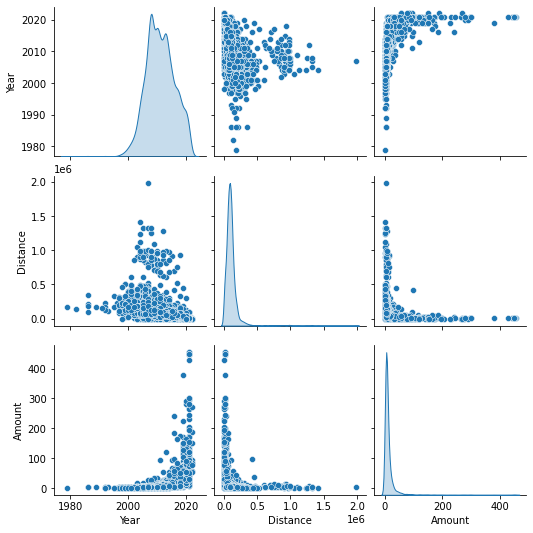

In [114]:
sns.pairplot(data = df,diag_kind = 'kde')

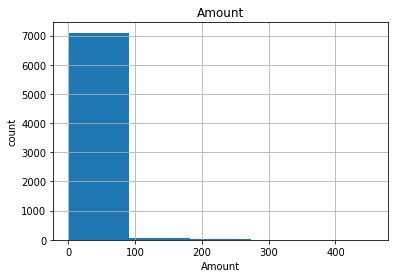

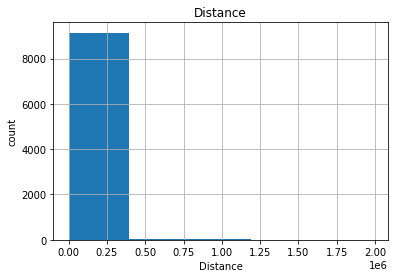

In [115]:
# draw  histogram of continuos categorical features
cont_features = ["Amount","Distance"]

for feature in cont_features:
    data = df.copy()
    data[feature].hist(bins = 5)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

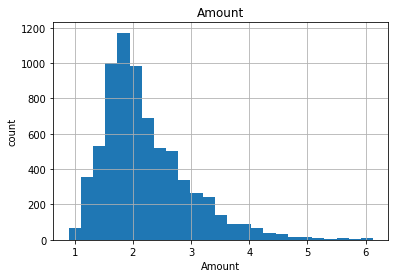

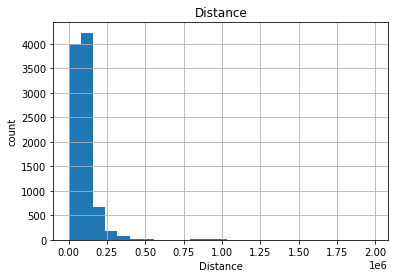

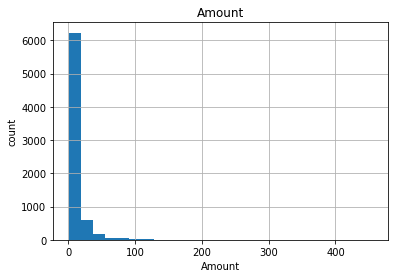

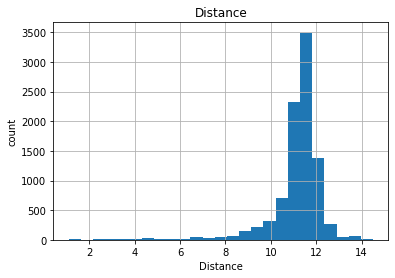

In [116]:
# Applying log_transform to the skwed data
for feature in cont_features:
    data = df.copy()
    data[feature] = np.log(data[feature] + 2)

    for feature in cont_features:
            data[feature].hist(bins = 25)
            plt.xlabel(feature)
            plt.ylabel("count")
            plt.title(feature)
            plt.show()


In [82]:
# log transform continuous features
cont_features = ["Amount","Distance"]
for feature in cont_features:
    df[feature] = np.log(df[feature] +1)
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,Nigerian Used,11.509246,1.163151
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,Nigerian Used,11.736077,1.504077
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,Foreign Used,11.615960,2.322388
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,Foreign Used,10.308986,3.169686
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,Nigerian Used,11.737724,1.280934


### Categorical Features

In [83]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature != "VehicleID"]
cat_features

['Location', 'Maker', 'Model', 'Colour', 'Type']

In [84]:
for feature in cat_features:
    print(feature,":",len(df[feature].unique()))

Location : 3
Maker : 56
Model : 1410
Colour : 24
Type : 3


In [85]:
#Using one hot encoding for Type
types = pd.get_dummies(df.Type,prefix='Use_type')
df = pd.concat([df,types],axis = 1)
df = df.drop(columns = "Type",axis = 1)

In [86]:

loca = pd.get_dummies(df.Location,prefix='Location_')
df = pd.concat([df,loca],axis = 1)
df = df.drop(columns = "Location",axis = 1)

In [87]:
df.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Location__Abuja,Location__Ibadan,Location__Lagos
0,VHL12546,Honda,Accord Coupe EX V-6,2011,Silver,11.509246,1.163151,0,0,1,1,0,0
1,VHL18827,Hyundai,Sonata,2012,Silver,11.736077,1.504077,0,0,1,0,1,0
2,VHL19499,Lexus,RX 350,2010,Red,11.615960,2.322388,0,1,0,0,0,1
3,VHL17991,Mercedes-Benz,GLE-Class,2017,Blue,10.308986,3.169686,0,1,0,1,0,0
4,VHL12170,Toyota,Highlander,2002,Red,11.737724,1.280934,0,0,1,0,1,0


In [89]:
df = df.drop(columns = ["Use_type_Nigerian Used","Location__Lagos"],axis = 1)
df.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Location__Abuja,Location__Ibadan
0,VHL12546,Honda,Accord Coupe EX V-6,2011,Silver,11.509246,1.163151,0,0,1,0
1,VHL18827,Hyundai,Sonata,2012,Silver,11.736077,1.504077,0,0,0,1
2,VHL19499,Lexus,RX 350,2010,Red,11.615960,2.322388,0,1,0,0
3,VHL17991,Mercedes-Benz,GLE-Class,2017,Blue,10.308986,3.169686,0,1,1,0
4,VHL12170,Toyota,Highlander,2002,Red,11.737724,1.280934,0,0,0,1


In [90]:
df.corr()

,Year,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Location__Abuja,Location__Ibadan
Year,1.000000,-0.554812,0.805947,0.333618,0.155566,0.150267,-0.194002
Distance,-0.554812,1.000000,-0.567469,-0.532946,-0.020457,-0.117015,0.127495
Amount,0.805947,-0.567469,1.000000,0.418928,0.246358,0.053441,-0.193792
Use_type_Brand New,0.333618,-0.532946,0.418928,1.000000,-0.277037,0.127919,-0.052886
Use_type_Foreign Used,0.155566,-0.020457,0.246358,-0.277037,1.000000,-0.231849,-0.006897
Location__Abuja,0.150267,-0.117015,0.053441,0.127919,-0.231849,1.000000,-0.281823
Location__Ibadan,-0.194002,0.127495,-0.193792,-0.052886,-0.006897,-0.281823,1.000000


In [91]:
# Using label encoding for remaining columns
feature_scale = ['Maker','Model','Colour']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in feature_scale:
    df[feature]=le.fit_transform(df[feature].astype(str))


df.head() 

,VehicleID,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Location__Abuja,Location__Ibadan
0,VHL12546,17,141,2011,18,11.509246,1.163151,0,0,1,0
1,VHL18827,19,1202,2012,18,11.736077,1.504077,0,0,0,1
2,VHL19499,29,1038,2010,17,11.615960,2.322388,0,1,0,0
3,VHL17991,34,588,2017,3,10.308986,3.169686,0,1,1,0
4,VHL12170,53,657,2002,17,11.737724,1.280934,0,0,0,1


In [92]:
# Drop vehicleId Column
df = df.drop(columns="VehicleID",axis = 1)
df.head()

,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Location__Abuja,Location__Ibadan
0,17,141,2011,18,11.509246,1.163151,0,0,1,0
1,19,1202,2012,18,11.736077,1.504077,0,0,0,1
2,29,1038,2010,17,11.615960,2.322388,0,1,0,0
3,34,588,2017,3,10.308986,3.169686,0,1,1,0
4,53,657,2002,17,11.737724,1.280934,0,0,0,1


In [93]:
# Feature scaling
feature_scaler = ["Model","Maker","Year","Colour","Distance"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for feature in feature_scaler:
    df[feature] = sc.fit_transform(df[[feature]])
df.head()

,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Location__Abuja,Location__Ibadan
0,-1.365283,-1.440299,-0.008476,1.034656,0.289968,1.163151,0,0,1,0
1,-1.229903,1.523851,0.196747,1.034656,0.477594,1.504077,0,0,0,1
2,-0.553003,1.065679,-0.213700,0.903165,0.378238,2.322388,0,1,0,0
3,-0.214553,-0.191501,1.222865,-0.937712,-0.702839,3.169686,0,1,1,0
4,1.071557,0.001267,-1.855487,0.903165,0.478956,1.280934,0,0,0,1


<AxesSubplot:>

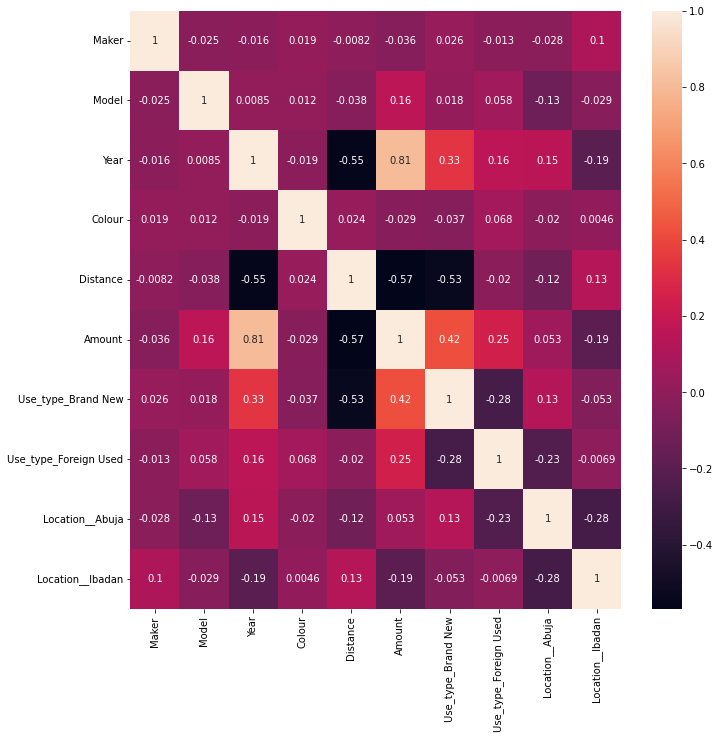

In [94]:
# correlation heatmap
cor=df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(cor,annot = True)

In [32]:
train_len = len(train)
test_len = len(test)
print("Train:",train_len," Test:",test_len)

Train: 7188  Test: 2061


### Trainign with linear regression

In [95]:

train_data=df.iloc[:7188,:]
test_data=df.iloc[7188:,:]

In [96]:
train_data.head()

,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Location__Abuja,Location__Ibadan
0,-1.365283,-1.440299,-0.008476,1.034656,0.289968,1.163151,0,0,1,0
1,-1.229903,1.523851,0.196747,1.034656,0.477594,1.504077,0,0,0,1
2,-0.553003,1.065679,-0.213700,0.903165,0.378238,2.322388,0,1,0,0
3,-0.214553,-0.191501,1.222865,-0.937712,-0.702839,3.169686,0,1,1,0
4,1.071557,0.001267,-1.855487,0.903165,0.478956,1.280934,0,0,0,1


In [97]:
# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)

In [98]:
# train with logistic regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [99]:
pred = lr.predict(x_test)
pred = np.exp(pred)
pred

array([ 7.80292024,  5.03122235, 19.64869709, ..., 16.62545201,
        3.3196003 , 67.26999893])

In [100]:
y_true = np.exp(y_test)
y_true

1935      4.75
3597      5.73
343      43.70
1497      8.20
573      18.50
         ...  
5703     19.85
5196      7.65
1684     29.00
644       3.45
6084    196.00
Name: Amount, Length: 1438, dtype: float64

In [101]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true,pred,squared = False)

23.928042074014158

In [102]:
# using SVM
from sklearn.svm import SVR
sv = SVR()
sv = sv.fit(x_train,y_train)

In [104]:
pred = sv.predict(x_test)

In [249]:
y_true = np.exp(y_test)
y_true

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [105]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true,pred,squared = False)

30.979666620794987

In [106]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
pred = rf.predict(x_test)
pred = np.exp(pred)
pred

array([ 6.14228934,  7.71654857, 49.66421615, ..., 21.15053567,
        3.87703876, 99.76078468])

In [107]:
y_true = np.exp(y_test)
y_true

1935      4.75
3597      5.73
343      43.70
1497      8.20
573      18.50
         ...  
5703     19.85
5196      7.65
1684     29.00
644       3.45
6084    196.00
Name: Amount, Length: 1438, dtype: float64

In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true,pred,squared = False)

30.979666620794987

In [109]:
## Xgboost
# create an xgboost regression model
import xgboost
...
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [110]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.149 (0.006)


In [27]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [28]:

pred = model.predict(x_test)
pred = np.exp(pred)
pred

array([  6.413105 ,   8.115384 ,  42.33525  , ...,  21.728794 ,
         4.0614605, 104.994125 ], dtype=float32)

In [29]:
y_true = np.exp(y_test)
y_true

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true,pred,squared = False)

13.787042696210829

### Adding new features

In [153]:
df = pd.read_csv("new_df.csv")
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used
0,0,9,458,2011,10,11.509256,1.435085,0,0,1
1,1,11,228,2012,10,11.736085,1.704748,0,0,1
2,2,22,45,2010,9,11.615969,2.415914,0,1,0
3,0,28,953,2017,17,10.309019,3.210844,0,1,0
4,1,49,1030,2002,9,11.737732,1.526056,0,0,1


In [154]:
# add age of car
current_year = 2022
df["Car_Age"] = current_year - df["Year"] 
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age
0,0,9,458,2011,10,11.509256,1.435085,0,0,1,11
1,1,11,228,2012,10,11.736085,1.704748,0,0,1,10
2,2,22,45,2010,9,11.615969,2.415914,0,1,0,12
3,0,28,953,2017,17,10.309019,3.210844,0,1,0,5
4,1,49,1030,2002,9,11.737732,1.526056,0,0,1,20


In [155]:
# Categorize cars based on year of manafactures
def feature(year):
    if year < 2009:
        return 0
    elif year < 2015:
        return 1
    elif year < 2019:
        return 2
    else:
        return 3
df["Manufacturing_year_category"] = df["Year"].apply(lambda x:feature(x))

<AxesSubplot:>

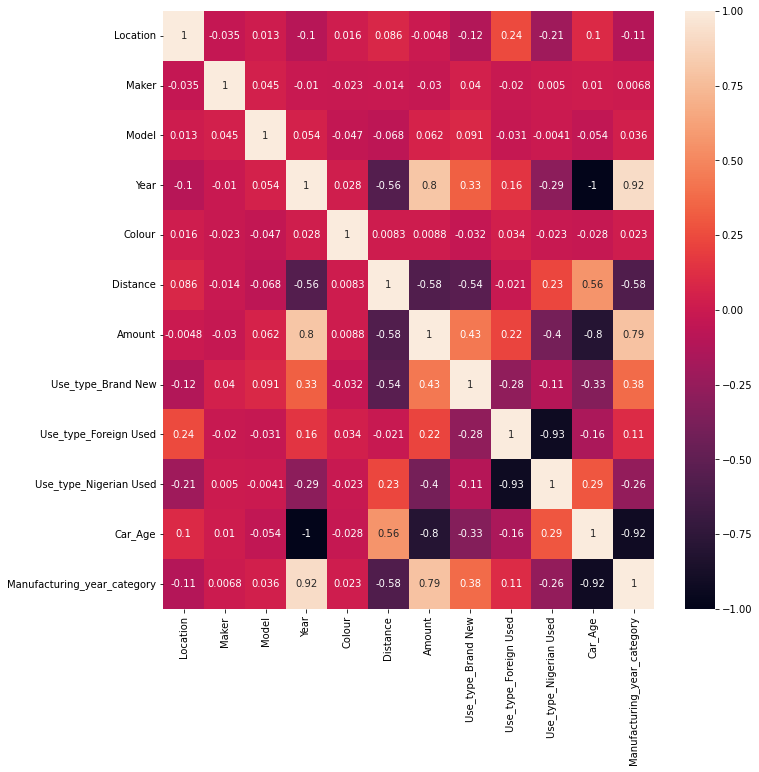

In [156]:
# correlation heatmap
cor=df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(cor,annot = True)


In [130]:
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category
0,0,9,458,2011,10,11.509256,1.435085,0,0,1,11,1
1,1,11,228,2012,10,11.736085,1.704748,0,0,1,10,1
2,2,22,45,2010,9,11.615969,2.415914,0,1,0,12,1
3,0,28,953,2017,17,10.309019,3.210844,0,1,0,5,2
4,1,49,1030,2002,9,11.737732,1.526056,0,0,1,20,0


In [158]:
# Since mean price of car in abuja is comaparably as compared to Lagos and Abuja
df["Location_Ibadan"] = df["Location"].apply(lambda x: 1 if x == 1 else 0)
df.head()


,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,0,9,458,2011,10,11.509256,1.435085,0,0,1,11,1,0
1,1,11,228,2012,10,11.736085,1.704748,0,0,1,10,1,1
2,2,22,45,2010,9,11.615969,2.415914,0,1,0,12,1,0
3,0,28,953,2017,17,10.309019,3.210844,0,1,0,5,2,0
4,1,49,1030,2002,9,11.737732,1.526056,0,0,1,20,0,1


In [159]:
# log down age
df["Car_Age"] = np.log(df["Car_Age"] + 3)
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,0,9,458,2011,10,11.509256,1.435085,0,0,1,2.639057,1,0
1,1,11,228,2012,10,11.736085,1.704748,0,0,1,2.564949,1,1
2,2,22,45,2010,9,11.615969,2.415914,0,1,0,2.708050,1,0
3,0,28,953,2017,17,10.309019,3.210844,0,1,0,2.079442,2,0
4,1,49,1030,2002,9,11.737732,1.526056,0,0,1,3.135494,0,1


In [160]:
# Feature scaling
feature_scaler = ["Location","Maker","Model","Year","Colour","Distance","Car_Age","Manufacturing_year_category"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for feature in feature_scaler:
    df[feature] = sc.fit_transform(df[[feature]])
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-1.048146,-1.557741,-0.629341,-0.008476,-0.844155,0.291077,1.435085,0,0,1,0.187026,0.017742,0
1,-0.001810,-1.424564,-1.226073,0.196747,-0.844155,0.479981,1.704748,0,0,1,0.005421,0.017742,1
2,1.044526,-0.692087,-1.700863,-0.213700,-1.037001,0.379948,2.415914,0,1,0,0.356097,0.017742,0
3,-1.048146,-0.292554,0.654929,1.222865,0.505771,-0.708487,3.210844,0,1,0,-1.184341,1.126492,0
4,-0.001810,1.105810,0.854705,-1.855487,-1.037001,0.481353,1.526056,0,0,1,1.403570,-1.091008,1


In [161]:
df.to_csv("Final_df.csv",index = False)

<AxesSubplot:>

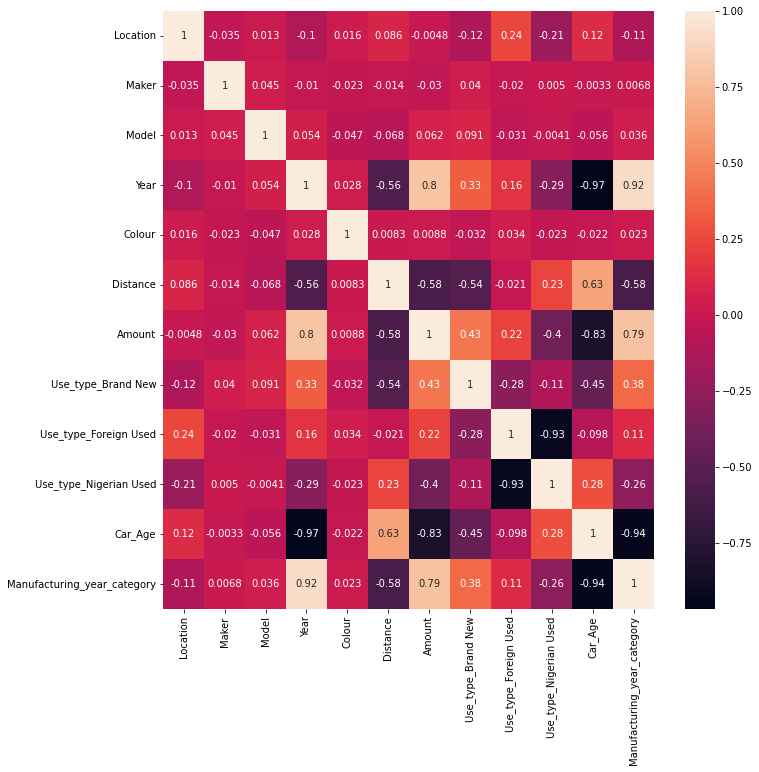

In [134]:
# correlation heatmap
cor=df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(cor,annot = True)

### Training new data with random forest

In [3]:
df = pd.read_csv("fina_data.csv")
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


In [183]:
data = pd.read_csv("my_data.csv")
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,Nigerian Used,99631.700472,2.2
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,Nigerian Used,125000.000000,3.5
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,Foreign Used,110852.000000,9.2
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,Foreign Used,30000.000000,22.8
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,Nigerian Used,125206.000000,2.6


In [184]:
data["lcbuja"] = data["Location"].apply(lambda x: 1 if x=="Abuja" else 0)
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount,lcbuja
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,Nigerian Used,99631.700472,2.2,1
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,Nigerian Used,125000.000000,3.5,0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,Foreign Used,110852.000000,9.2,0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,Foreign Used,30000.000000,22.8,1
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,Nigerian Used,125206.000000,2.6,0


In [156]:
abj = data["lcbuja"]

In [186]:
dist = data["Distance"] 
y = data["Year"] 

In [187]:
df["Distance"] = dist
df["Year"] = y
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,2011.0,0.5625,99631.700472,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,2012.0,0.5625,125000.000000,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,2010.0,0.5000,110852.000000,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,2017.0,-0.3750,30000.000000,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,2002.0,0.5000,125206.000000,1.526056,0,0,1,1.500000,-1.0,1


In [122]:
d = df.copy()
d["Distance"] = np.log(d["Distance"])

<AxesSubplot:>

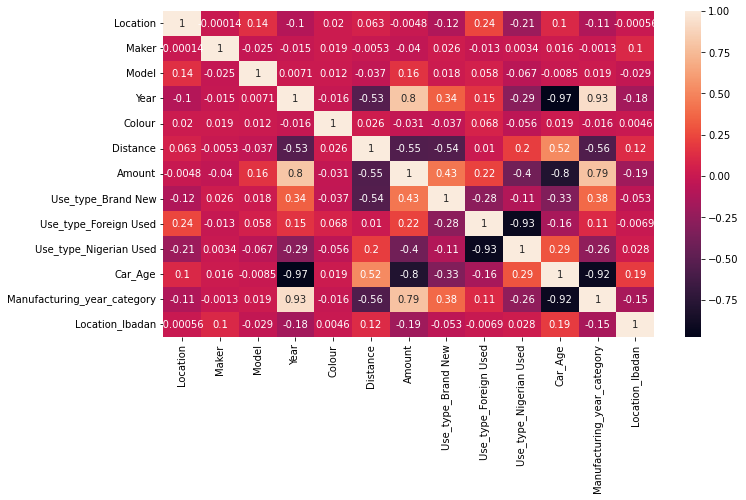

In [123]:
# correlation heatmap
cor=d.corr()
plt.figure(figsize=(11,6))
sns.heatmap(cor,annot = True)


In [124]:
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,2011.0,0.5625,99631.700472,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,2012.0,0.5625,125000.000000,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,2010.0,0.5000,110852.000000,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,2017.0,-0.3750,30000.000000,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,2002.0,0.5000,125206.000000,1.526056,0,0,1,1.500000,-1.0,1


In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df["Distance"] = sc.fit_transform(df[["Distance"]])
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,2011.0,0.5625,0.302917,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,2012.0,0.5625,0.885110,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,2010.0,0.5000,0.560419,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,2017.0,-0.3750,-1.295103,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,2002.0,0.5000,0.889838,1.526056,0,0,1,1.500000,-1.0,1


In [159]:
df.head()
df["Location_Abuja"] = abj
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_Abuja
0,-0.5,-0.708333,-0.725732,2011.0,0.5625,0.302917,1.435085,0,0,1,0.000000,0.0,0,1
1,0.0,-0.625000,0.909091,2012.0,0.5625,0.885110,1.704748,0,0,1,-0.166667,0.0,1,0
2,0.5,-0.208333,0.656394,2010.0,0.5000,0.560419,2.415914,0,1,0,0.166667,0.0,0,0
3,-0.5,0.000000,-0.036980,2017.0,-0.3750,-1.295103,3.210844,0,1,0,-1.000000,1.0,0,1
4,0.0,0.791667,0.069337,2002.0,0.5000,0.889838,1.526056,0,0,1,1.500000,-1.0,1,0


In [160]:
df = df.drop("Location",axis = 1)

In [171]:
df.head()

,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_Abuja
0,-0.708333,-0.725732,2011.0,0.5625,0.302917,1.435085,0,0,1,0.000000,0.0,0,1
1,-0.625000,0.909091,2012.0,0.5625,0.885110,1.704748,0,0,1,-0.166667,0.0,1,0
2,-0.208333,0.656394,2010.0,0.5000,0.560419,2.415914,0,1,0,0.166667,0.0,0,0
3,0.000000,-0.036980,2017.0,-0.3750,-1.295103,3.210844,0,1,0,-1.000000,1.0,0,1
4,0.791667,0.069337,2002.0,0.5000,0.889838,1.526056,0,0,1,1.500000,-1.0,1,0


In [172]:
df = df.drop(columns = ["Use_type_Foreign Used",],axis = 1)

In [4]:
# Split data into training and test

train_data=df.iloc[:7188,:]
test_data=df.iloc[7188:,:]

In [5]:
# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)

In [175]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [176]:

pred = rf.predict(x_test)
pred = np.exp(pred)
pred

array([ 6.24988357,  7.33084552, 48.51409548, ..., 23.89814486,
        3.87458027, 94.42517194])

In [177]:
y_true = np.exp(y_test)
y_true

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [178]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true,pred,squared = False)
# Not a bad one lets try using xgboost

16.630130108035058

### Training with xgboost

In [171]:
train_data.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-1.048146,-1.557741,-0.629341,-0.008476,-0.844155,0.291077,1.435085,0,0,1,0.187026,0.017742,0
1,-0.001810,-1.424564,-1.226073,0.196747,-0.844155,0.479981,1.704748,0,0,1,0.005421,0.017742,1
2,1.044526,-0.692087,-1.700863,-0.213700,-1.037001,0.379948,2.415914,0,1,0,0.356097,0.017742,0
3,-1.048146,-0.292554,0.654929,1.222865,0.505771,-0.708487,3.210844,0,1,0,-1.184341,1.126492,0
4,-0.001810,1.105810,0.854705,-1.855487,-1.037001,0.481353,1.526056,0,0,1,1.403570,-1.091008,1


In [6]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.131 (0.005)


In [180]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [181]:
pred = model.predict(x_test)
#pred = np.exp(pred)
pred = np.exp(pred)
pred

array([  6.3660526,   8.321709 ,  41.713913 , ...,  25.262943 ,
         4.011214 , 109.11995  ], dtype=float32)

1935    1.749200
3597    1.906575
343     3.799974
1497    2.219203
573     2.970414
          ...   
5703    3.037354
5196    2.157559
1684    3.401197
644     1.492904
6084    5.283204
Name: Amount, Length: 1438, dtype: float64

In [142]:
y_test = np.exp(y_test)
y_test

1935    3.141907e+02
3597    8.371473e+02
343     2.587994e+19
1497    9.897129e+03
573     2.942676e+08
            ...     
5703    1.135115e+09
5196    5.710147e+03
1684    1.068647e+13
644     8.562694e+01
6084    3.597601e+85
Name: Amount, Length: 1438, dtype: float64

In [182]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true,pred,squared = False)

14.284955014262076

In [134]:
test_data=test_data.drop(columns = "Amount",axis = 1)
test_data.head()

,Location,Maker,Model,Year,Colour,Distance,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Maker_model,Maker_Year
7188,-1.048146,-2.312943,-1.758785,-0.624147,1.560621,-0.694067,0,1,0,0.664998,-1.091008,-0.096703,-0.096713
7189,1.044526,1.071557,-0.951396,0.401971,1.560621,0.186612,0,1,0,-0.204723,0.017742,1.541401,1.541569
7190,1.044526,1.071557,0.043173,-1.239817,-0.280256,0.664849,0,1,0,1.074955,-1.091008,-0.506229,-0.506284
7191,1.044526,1.071557,-0.951396,-0.008476,-0.148765,0.720422,0,1,0,0.178528,0.017742,1.541401,1.541569
7192,1.044526,-0.553003,-0.484843,0.401971,0.903165,0.195809,0,1,0,-0.204723,0.017742,-0.915755,-0.915854


In [47]:

# open file to save model
import pickle
file = open("xgb_best1.pkl","wb")
# dump information to that file
pickle.dump(model,file)


In [142]:
preds = model.predict(test_data)
preds = np.exp(preds)

In [143]:
# make submission
# import train data
sub = open(r"C:\Users\user\Desktop\ML PROJECTS\Great_Motors_car_price\Datasets\SampleSubmission.csv")
sub = pd.read_csv(sub)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [146]:
sub["Amount (Million Naira)"] = preds
sub.to_csv("Submission1.csv",index=False)
len(sub)

2061

### Adding extra features

In [48]:
### Training with final data1

df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1


In [151]:
# Since mean price of car in abuja is comaparably as compared to Lagos and Abuja
df["Location_Ibadan"] = df["Location"].apply(lambda x: 1 if x == -0.001810 else 0)
df.head()
df.to_csv("final_df.csv",index = False)
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-1.048146,-1.557741,-0.629341,-0.008476,-0.844155,0.291077,1.435085,0,0,1,0.187026,0.017742,0
1,-0.001810,-1.424564,-1.226073,0.196747,-0.844155,0.479981,1.704748,0,0,1,0.005421,0.017742,0
2,1.044526,-0.692087,-1.700863,-0.213700,-1.037001,0.379948,2.415914,0,1,0,0.356097,0.017742,0
3,-1.048146,-0.292554,0.654929,1.222865,0.505771,-0.708487,3.210844,0,1,0,-1.184341,1.126492,0
4,-0.001810,1.105810,0.854705,-1.855487,-1.037001,0.481353,1.526056,0,0,1,1.403570,-1.091008,0


In [111]:

df.to_csv("new_data1.csv",index = False)

In [96]:
## Feature Scaling
# Feature scaling
feature_scaler = ["Location","Maker","Model","Year","Colour","Distance","Car_Age","Manufacturing_year_category"]
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
for feature in feature_scaler:
    df[feature] = sc.fit_transform(df[[feature]])
df.head()


,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


In [182]:
### Training with Xgboost
df = pd.read_csv("dl_data.csv")
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


In [183]:
# Split data into training and test

train_data=df.iloc[:7188,:]
test_data=df.iloc[7188:,:]
len(test_data)

2061

In [184]:
train_data.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


In [185]:
# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)

In [186]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.131 (0.005)


In [187]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [188]:
preds = model.predict(x_test)
preds = np.exp(preds)
preds

array([  6.510146,   8.210359,  46.600945, ...,  23.093658,   4.060185,
       104.87154 ], dtype=float32)

In [189]:
y = np.exp(y_test)
y

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [190]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

13.210545056002497

In [104]:
# save new model
import pickle

# open file to save model
import pickle
file = open("xgb_notune3rd.pkl","wb")
# dump information to that file
pickle.dump(regr_trans,file)



In [105]:
test_data = test_data.drop("Amount",axis = 1)
test_data.head(4)

,Location,Maker,Model,Year,Colour,Distance,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
7188,-0.5,-1.291667,-0.901387,-0.500000,0.8125,-1.404656,0,1,0,0.500000,-1.0,0
7189,0.5,0.791667,-0.456086,0.333333,0.8125,0.000000,0,1,0,-0.333333,0.0,0
7190,0.5,0.791667,0.092450,-1.000000,-0.0625,0.762772,0,1,0,1.000000,-1.0,0
7191,0.5,0.791667,-0.456086,0.000000,0.0000,0.851409,0,1,0,0.000000,0.0,0
7192,0.5,-0.208333,-0.198767,0.333333,0.5000,0.014668,0,1,0,-0.333333,0.0,0


In [106]:
# Make submissions
predictions = model.predict(test_data)
predictions = np.exp(predictions)
predictions

array([ 5.790128,  7.703341,  5.97824 , ...,  8.440221, 12.616166,
        8.917284], dtype=float32)

In [107]:
# make submission
# import train data
sub = open(r"C:\Users\user\Desktop\ML PROJECTS\Great_Motors_car_price\Datasets\SampleSubmission.csv")
sub = pd.read_csv(sub)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [108]:
sub["Amount (Million Naira)"] = predictions
sub.to_csv("Submission4.csv",index=False)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,5.790128
1,VHL17149,7.703341
2,VHL10927,5.978240
3,VHL12909,6.531026
4,VHL12348,10.516854


### Feature Selection

In [148]:
df = pd.read_csv("new_data2.csv")
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_Abuja
0,0,17,141,2011,18,11.509256,1.435085,0,0,1,11,1,0,1
1,1,19,1202,2012,18,11.736085,1.704748,0,0,1,10,1,1,0
2,2,29,1038,2010,17,11.615969,2.415914,0,1,0,12,1,0,0
3,0,34,588,2017,3,10.309019,3.210844,0,1,0,5,2,0,1
4,1,53,657,2002,17,11.737732,1.526056,0,0,1,20,0,1,0


In [149]:
## Feature Scaling
# Feature scaling
feature_scaler = ["Location","Maker","Model","Year","Colour","Distance","Car_Age","Manufacturing_year_category"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for feature in feature_scaler:
    df[feature] = sc.fit_transform(df[[feature]])
df.head()


,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_Abuja
0,-1.048146,-1.365283,-1.440299,-0.008476,1.034656,0.291077,1.435085,0,0,1,0.008476,0.017742,0,1
1,-0.001810,-1.229903,1.523851,0.196747,1.034656,0.479981,1.704748,0,0,1,-0.196747,0.017742,1,0
2,1.044526,-0.553003,1.065679,-0.213700,0.903165,0.379948,2.415914,0,1,0,0.213700,0.017742,0,0
3,-1.048146,-0.214553,-0.191501,1.222865,-0.937712,-0.708487,3.210844,0,1,0,-1.222865,1.126492,0,1
4,-0.001810,1.071557,0.001267,-1.855487,0.903165,0.481353,1.526056,0,0,1,1.855487,-1.091008,1,0


In [150]:
# Split data into training and test

train_data=df.iloc[:7188,:]
test_data=df.iloc[7188:,:]
len(test_data)

2061

In [151]:
# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option("display.max_columns",None)


In [153]:
feature_sel_mode = SelectFromModel(Lasso(alpha = 0.005,random_state = 0))
feature_sel_mode.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [154]:
feature_sel_mode.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False])

In [155]:
# print number of total and selected feature
selected_feature = x_train.columns[(feature_sel_mode.get_support())]
print("Total number of featurea:{}".format((x_train.shape[1])))
print("Selected features:{}".format(len(selected_feature)))
print("Features with coefficients shrunk to zero:{}".format(np.sum(feature_sel_mode.estimator_.coef_ == 0)))


Total number of featurea:13
Selected features:11
Features with coefficients shrunk to zero:2


In [156]:
# Train with linear regression
X_train = x_train[selected_feature]
X_train.shape

(5750, 11)

In [168]:
selected_feature

Index(['Location', 'Maker', 'Model', 'Year', 'Colour', 'Distance',
       'Use_type_Brand New', 'Use_type_Nigerian Used', 'Car_Age',
       'Manufacturing_year_category', 'Location_Ibadan'],
      dtype='object')

In [159]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X_train,y_train,test_size = 0.2,random_state =1)


In [160]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [161]:
preds = model.predict(x_test)
preds = np.exp(preds)
preds

array([  6.510146,   8.210359,  46.600945, ...,  23.093658,   4.060185,
       104.87154 ], dtype=float32)

In [164]:
y = np.exp(y_test)
y

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [165]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

13.206858738052588

### Training with selected features


In [178]:
selected = ['Location', 'Maker', 'Model', 'Year', 'Colour', 'Distance',
       'Use_type_Brand New', 'Use_type_Nigerian Used', 'Car_Age',
       'Manufacturing_year_category', 'Location_Ibadan','Amount']
df = pd.read_csv("new_data2.csv")
df = df[selected]

In [179]:
df.head()
df.to_csv("processed_data1.csv",index = False)

In [180]:
df.head()

,Location,Maker,Model,Year,Colour,Distance,Use_type_Brand New,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Amount
0,0,17,141,2011,18,11.509256,0,1,11,1,0,1.435085
1,1,19,1202,2012,18,11.736085,0,1,10,1,1,1.704748
2,2,29,1038,2010,17,11.615969,0,0,12,1,0,2.415914
3,0,34,588,2017,3,10.309019,0,0,5,2,0,3.210844
4,1,53,657,2002,17,11.737732,0,1,20,0,1,1.526056


In [181]:
## Feature Scaling
# Feature scaling
feature_scaler = ["Location","Maker","Model","Year","Colour","Distance","Car_Age","Manufacturing_year_category"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for feature in feature_scaler:
    df[feature] = sc.fit_transform(df[[feature]])
df.head()


,Location,Maker,Model,Year,Colour,Distance,Use_type_Brand New,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Amount
0,-1.048146,-1.365283,-1.440299,-0.008476,1.034656,0.291077,0,1,0.008476,0.017742,0,1.435085
1,-0.001810,-1.229903,1.523851,0.196747,1.034656,0.479981,0,1,-0.196747,0.017742,1,1.704748
2,1.044526,-0.553003,1.065679,-0.213700,0.903165,0.379948,0,0,0.213700,0.017742,0,2.415914
3,-1.048146,-0.214553,-0.191501,1.222865,-0.937712,-0.708487,0,0,-1.222865,1.126492,0,3.210844
4,-0.001810,1.071557,0.001267,-1.855487,0.903165,0.481353,0,1,1.855487,-1.091008,1,1.526056


In [182]:
# Split data into training and test

train_data=df.iloc[:7188,:]
test_data=df.iloc[7188:,:]
len(test_data)

2061

In [183]:
# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)

In [184]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.131 (0.006)


In [185]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [186]:
preds = model.predict(x_test)
preds = np.exp(preds)
preds

array([  6.3432503,   8.366722 ,  41.824173 , ...,  23.235584 ,
         3.9832547, 107.82814  ], dtype=float32)

In [187]:
y = np.exp(y_test)
y

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [188]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)
## We got a lesser result after dropping the columns

13.832684644160048

### Trying other models with the best preprocessed data so far

In [3]:
### Trying other models with the best preprocessed data so far
df =pd.read_csv("new_data1.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'new_data1.csv'

In [4]:
## Feature Scaling
# Feature scaling
feature_scaler = ["Location","Maker","Model","Year","Colour","Distance","Car_Age","Manufacturing_year_category"]
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
for feature in feature_scaler:
    df[feature] = sc.fit_transform(df[[feature]])
df.head()


,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


In [5]:
df.to_csv("dl_data.csv",index = False)

In [272]:
# Split data into training and test

train_data=df.iloc[:7188,:]
test_data=df.iloc[7188:,:]
len(test_data)

2061

In [273]:
# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)

#### Using gradient boosting

In [107]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.165 (0.006)


In [108]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [109]:
preds = model.predict(x_test)
preds = np.exp(preds)
preds

array([  6.60699523,   8.48652123,  33.66485091, ...,  24.38981933,
         4.19097976, 110.29010492])

In [110]:
y = np.exp(y_test)
y

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [111]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

17.644004038920464

### Tuning with gradient boosting

In [112]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators':[100,130,200,250,400,500,600,650,800],
 'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [113]:
rs_model=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [114]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [116]:

print("Best parameters:",  rs_model.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

## Xgboost

In [145]:
d.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount,Abuja,Lagos
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,Nigerian Used,NaN,2.2,1,0
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,Nigerian Used,125000.0,3.5,0,0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,Foreign Used,110852.0,9.2,0,1
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,Foreign Used,30000.0,22.8,1,0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,Nigerian Used,125206.0,2.6,0,0


In [23]:
d = pd.read_csv("y.csv")
amt = d["Amount"]
d.head()
d["Abuja"] = d["Location"].apply(lambda x: 1 if x == "Abuja" else 0)
d["Lagos"] = d["Location"].apply(lambda x: 1 if x == "Lagos" else 0)
x = d["Abuja"]
y = d["Lagos"]
d.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Amount,Abuja,Lagos
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,Nigerian Used,NaN,2.2,1,0
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,Nigerian Used,125000.0,3.5,0,0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,Foreign Used,110852.0,9.2,0,1
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,Foreign Used,30000.0,22.8,1,0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,Nigerian Used,125206.0,2.6,0,0


In [144]:
df.head()
df["Amount"] = np.log(df["Amount"])
df.head()

C:\Users\user\anaconda3\envs\great_motor\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\envs\great_motor\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_Abuja,Location_lagos
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,-0.237677,0,0,1,0.000000,0.0,0,1,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,0.225351,0,0,1,-0.166667,0.0,1,0,0
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,0.797148,0,1,0,0.166667,0.0,0,0,1
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,1.139997,0,1,0,-1.000000,1.0,0,1,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,-0.045509,0,0,1,1.500000,-1.0,1,0,0


In [147]:
df = pd.read_csv("fina_data.csv")
df["Amount"] = amt
df["Location_Abuja"] = x
df["Location_lagos"] = y
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_Abuja,Location_lagos
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,2.2,0,0,1,0.000000,0.0,0,1,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,3.5,0,0,1,-0.166667,0.0,1,0,0
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,9.2,0,1,0,0.166667,0.0,0,0,1
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,22.8,0,1,0,-1.000000,1.0,0,1,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,2.6,0,0,1,1.500000,-1.0,1,0,0


In [127]:
df.corr()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_Abuja,Location_lagos
Location,1.000000,-0.000136,0.139363,-0.099523,0.019932,0.085582,-0.078780,-0.117760,0.243673,-0.205784,0.099523,-0.112355,-0.000557,-0.959309,0.959334
Maker,-0.000136,1.000000,-0.024700,-0.015531,0.019124,-0.008388,-0.050539,0.025548,-0.012976,0.003369,0.015531,-0.001346,0.101279,-0.028467,-0.028718
Model,0.139363,-0.024700,1.000000,0.008479,0.012346,-0.037787,0.084575,0.017667,0.058499,-0.067488,-0.008479,0.019116,-0.028878,-0.125560,0.141825
Year,-0.099523,-0.015531,0.008479,1.000000,-0.018770,-0.558316,0.453083,0.333618,0.155566,-0.292309,-1.000000,0.917476,-0.194002,0.150267,-0.040698
Colour,0.019932,0.019124,0.012346,-0.018770,1.000000,0.024465,-0.039421,-0.036870,0.067928,-0.055774,0.018770,-0.016150,0.004639,-0.020434,0.017809
Distance,0.085582,-0.008388,-0.037787,-0.558316,0.024465,1.000000,-0.420941,-0.535638,-0.020623,0.232206,0.558316,-0.583794,0.128111,-0.118286,0.045926
Amount,-0.078780,-0.050539,0.084575,0.453083,-0.039421,-0.420941,1.000000,0.518997,-0.029149,-0.171617,-0.453083,0.482173,-0.091002,0.101358,-0.049814
Use_type_Brand New,-0.117760,0.025548,0.017667,0.333618,-0.036870,-0.535638,0.518997,1.000000,-0.277037,-0.107006,-0.333618,0.382028,-0.052886,0.127919,-0.098024
Use_type_Foreign Used,0.243673,-0.012976,0.058499,0.155566,0.067928,-0.020623,-0.029149,-0.277037,1.000000,-0.925698,-0.155566,0.109265,-0.006897,-0.231849,0.235672
Use_type_Nigerian Used,-0.205784,0.003369,-0.067488,-0.292309,-0.055774,0.232206,-0.171617,-0.107006,-0.925698,1.000000,0.292309,-0.263457,0.027957,0.189549,-0.205275


In [97]:
df["Amount"] = np.
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,4.2,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,5.5,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,11.2,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,24.8,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,4.6,0,0,1,1.500000,-1.0,1


In [3]:
data = pd.read_csv("new_features_df.csv")
data.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,0,17,141,2011.0,18,99631.700472,1.163151,0,0,1,11.0,1,0
1,1,19,1202,2012.0,18,125000.000000,1.504077,0,0,1,10.0,1,1
2,2,29,1038,2010.0,17,110852.000000,2.322388,0,1,0,12.0,1,0
3,0,34,588,2017.0,3,30000.000000,3.169686,0,1,0,5.0,2,0
4,1,53,657,2002.0,17,125206.000000,1.280934,0,0,1,20.0,0,1


In [211]:
distance = np.array(data["Distance"])

In [8]:
data["Maker"]

array([17, 19, 29, 34, 53,  0, 11, 37, 25,  3, 55, 14, 28, 30, 39,  8,  1,
       23, 21, 41, 13, 32, 54, 51,  4, 15, 33, 47, 42, 36, 35, 40,  7, 12,
       24,  6, 43, 16,  9, 27, 10, 26,  2, 46, 52, 38, 22, 31, 18, 50, 44,
       45, 49, 20,  5, 48], dtype=int64)

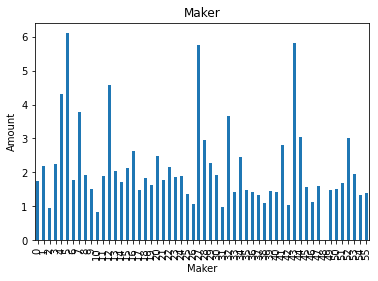

In [10]:


data.groupby("Maker")["Amount"].mean().plot.bar()
plt.xlabel("Maker")
plt.ylabel("Amount")
plt.title("Maker")
plt.show()
#Lagos has the highest median amount price slightly higher than Abuja
# Ibadan has the lowest Median Sale Price

In [212]:
df["Distance"] = distance
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,99631.700472,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,125000.000000,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,110852.000000,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,30000.000000,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,125206.000000,1.526056,0,0,1,1.500000,-1.0,1


In [213]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df["Distance"] = sc.fit_transform(df[["Distance"]])
df.corr()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
Location,1.000000,-0.000136,0.139363,-0.099523,0.019932,0.075244,-0.004848,-0.117760,0.243673,-0.205784,0.099523,-0.112355,-0.000557
Maker,-0.000136,1.000000,-0.024700,-0.015531,0.019124,0.015864,-0.039645,0.025548,-0.012976,0.003369,0.015531,-0.001346,0.101279
Model,0.139363,-0.024700,1.000000,0.008479,0.012346,-0.010969,0.157156,0.017667,0.058499,-0.067488,-0.008479,0.019116,-0.028878
Year,-0.099523,-0.015531,0.008479,1.000000,-0.018770,-0.548312,0.797128,0.333618,0.155566,-0.292309,-1.000000,0.917476,-0.194002
Colour,0.019932,0.019124,0.012346,-0.018770,1.000000,0.009369,-0.031435,-0.036870,0.067928,-0.055774,0.018770,-0.016150,0.004639
Distance,0.075244,0.015864,-0.010969,-0.548312,0.009369,1.000000,-0.630523,-0.252174,-0.129372,0.233144,0.548312,-0.532852,0.133141
Amount,-0.004848,-0.039645,0.157156,0.797128,-0.031435,-0.630523,1.000000,0.434683,0.223910,-0.400511,-0.797128,0.786480,-0.189284
Use_type_Brand New,-0.117760,0.025548,0.017667,0.333618,-0.036870,-0.252174,0.434683,1.000000,-0.277037,-0.107006,-0.333618,0.382028,-0.052886
Use_type_Foreign Used,0.243673,-0.012976,0.058499,0.155566,0.067928,-0.129372,0.223910,-0.277037,1.000000,-0.925698,-0.155566,0.109265,-0.006897
Use_type_Nigerian Used,-0.205784,0.003369,-0.067488,-0.292309,-0.055774,0.233144,-0.400511,-0.107006,-0.925698,1.000000,0.292309,-0.263457,0.027957


In [27]:
df = pd.read_csv("fina_data.csv")
df["Location_lagos"] = y
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_lagos
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1,0
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0,1
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1,0


In [28]:
df = df.drop(columns = ["Year","Location","Use_type_Nigerian Used","Manufacturing_year_category"],axis = 1)

In [29]:
df.head()

,Maker,Model,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Car_Age,Location_Ibadan,Location_lagos
0,-0.708333,-0.725732,0.5625,0.166617,1.435085,0,0,0.000000,0,0
1,-0.625000,0.909091,0.5625,0.467914,1.704748,0,0,-0.166667,1,0
2,-0.208333,0.656394,0.5000,0.308364,2.415914,0,1,0.166667,0,1
3,0.000000,-0.036980,-0.3750,-1.427655,3.210844,0,1,-1.000000,0,0
4,0.791667,0.069337,0.5000,0.470101,1.526056,0,0,1.500000,1,0


In [9]:
df = pd.read_csv("fina_data.csv")
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


In [10]:
# Split data into training and test

train_data=df.iloc[:7188,:]
test_data=df.iloc[7188:,:]
len(test_data)

2061

<AxesSubplot:>

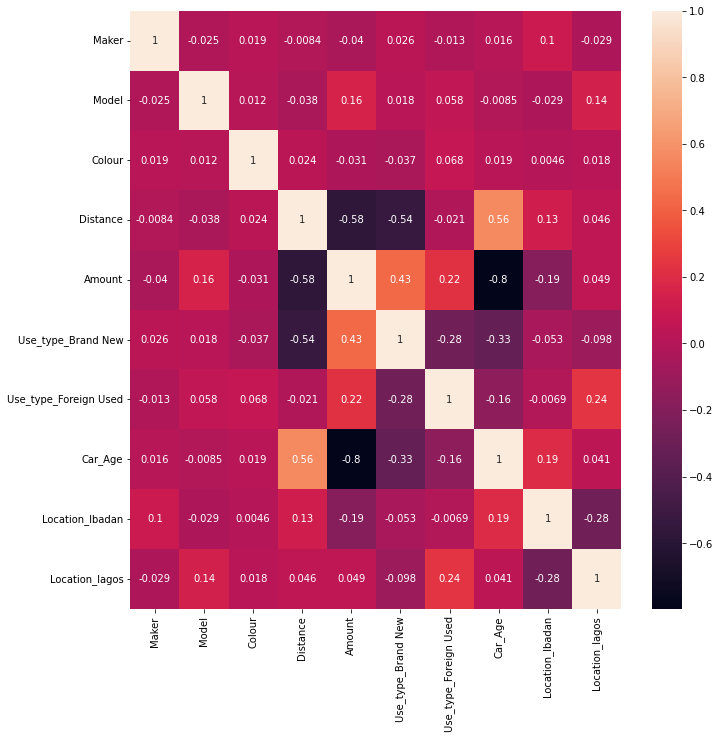

In [31]:
# correlation heatmap
cor=df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(cor,annot = True)

In [32]:
df = df.drop(columns = ["Year","Location","Use_type_Nigerian Used","Location_lagos"],axis = 1)

KeyError: "['Year', 'Location', 'Use_type_Nigerian Used'] not found in axis"

In [136]:
train_data.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan,Location_Abuja,Location_lagos
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,0.788457,0,0,1,0.000000,0.0,0,1,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.252763,0,0,1,-0.166667,0.0,1,0,0
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.219203,0,1,0,0.166667,0.0,0,0,1
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.126761,0,1,0,-1.000000,1.0,0,1,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,0.955511,0,0,1,1.500000,-1.0,1,0,0


C:\Users\user\anaconda3\envs\great_motor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

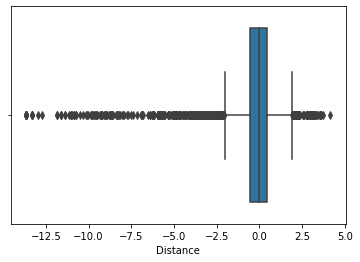

In [6]:
sns.boxplot(train_data["Distance"])

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


In [72]:
train_data.corr()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
Location,1.000000,-0.008985,0.133853,-0.097956,0.022962,0.052262,-0.004848,-0.117155,0.247078,-0.209943,0.097956,-0.109890,-0.002514
Maker,-0.008985,1.000000,-0.048185,-0.008215,0.025708,0.018109,-0.039645,0.026403,-0.013555,0.003753,0.008215,0.006416,0.094330
Model,0.133853,-0.048185,1.000000,0.008134,0.013968,-0.027819,0.157156,0.011259,0.060068,-0.066489,-0.008134,0.022429,-0.038627
Year,-0.097956,-0.008215,0.008134,1.000000,-0.020871,-0.660468,0.797128,0.330382,0.158208,-0.292026,-1.000000,0.919336,-0.191408
Colour,0.022962,0.025708,0.013968,-0.020871,1.000000,0.010683,-0.031435,-0.036213,0.074186,-0.062633,0.020871,-0.015001,0.010057
Distance,0.052262,0.018109,-0.027819,-0.660468,0.010683,1.000000,-0.630523,-0.322085,-0.152327,0.282719,0.660468,-0.657370,0.169199
Amount,-0.004848,-0.039645,0.157156,0.797128,-0.031435,-0.630523,1.000000,0.434683,0.223910,-0.400511,-0.797128,0.786480,-0.189284
Use_type_Brand New,-0.117155,0.026403,0.011259,0.330382,-0.036213,-0.322085,0.434683,1.000000,-0.274076,-0.105342,-0.330382,0.377530,-0.051511
Use_type_Foreign Used,0.247078,-0.013555,0.060068,0.158208,0.074186,-0.152327,0.223910,-0.274076,1.000000,-0.927486,-0.158208,0.113235,-0.014304
Use_type_Nigerian Used,-0.209943,0.003753,-0.066489,-0.292026,-0.062633,0.282719,-0.400511,-0.105342,-0.927486,1.000000,0.292026,-0.263852,0.034815


In [11]:
# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)

In [12]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor()#(n_estimators =  ,learning_rate = 0.15)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.131 (0.005)


In [13]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [14]:
preds = model.predict(x_test)
preds =np.exp(preds)
y_test = np.exp(y_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,preds,squared = False)

13.210545056002497

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,preds,squared = False)

14.061964108049287

### Training with full data

In [41]:

# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]

In [42]:
model.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [23]:
# save new model
import pickle

# open file to save model
import pickle
file = open("xgb_notuningbest1.pkl","wb")
# dump information to that file
pickle.dump(model,file)



In [43]:
test_data = test_data.drop("Amount",axis = 1)
len(test_data)

2061

In [44]:
### Make submissions# Make submissions
predictions = model.predict(test_data)
predictions = np.exp(predictions)
predictions

array([ 6.7012963,  7.835914 ,  6.0518985, ...,  8.360583 , 11.456671 ,
        7.522828 ], dtype=float32)

In [45]:
# make submission
# import train data
sub = open(r"C:\Users\user\Desktop\ML PROJECTS\Great_Motors_car_price\Datasets\SampleSubmission.csv")
sub = pd.read_csv(sub)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [46]:
sub["Amount (Million Naira)"] = predictions
sub.to_csv("Submission10.csv",index=False)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,6.701296
1,VHL17149,7.835914
2,VHL10927,6.051898
3,VHL12909,6.426550
4,VHL12348,10.163810


### Hyperparamter tuning with xgboost

In [163]:
import xgboost as xgb
regressor = xgb.XGBRegressor()

In [186]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators':np.arange(80,800,10),#[100,130,200,250,400,500],
 'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [187]:
rs_model=RandomizedSearchCV(regressor,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [188]:

rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[15:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "olsample_bytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0.3,
                                          gpu_id=-1, grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.15, max_bin=256,
                                          max_ca...
                                        'n_estimators': array([ 80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
       210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330,
       340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460,
       470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590,
       600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720,
       730, 740, 750, 760, 770, 780, 790])},
                   scoring='neg_mean_squared_error', verbose=3)

In [189]:

print("Best parameters:", rs_model.best_params_)

Best parameters: {'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.4}


In [190]:
regressor = xgb.XGBRegressor(n_estimators = 250,min_child_weight=5, max_depth=5, learning_rate= 0.3, gamma=0.0)

In [191]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=250, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [192]:
preds = regressor.predict(x_test)
preds = np.exp(preds)
preds

array([  6.520881,   9.400045,  41.69958 , ...,  25.625195,   4.192922,
       116.11233 ], dtype=float32)

In [193]:
y = np.exp(y_test)
y

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [194]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

14.134842130527302

In [39]:
# save new model
import pickle

# open file to save model
import pickle
file = open("xgb_tunedbest1.pkl","wb")
# dump information to that file
pickle.dump(model,file)



In [40]:
# Train on full data
regressor.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [41]:
len(test_data)

2061

In [42]:
### Make submissions# Make submissions
predictions = regressor.predict(test_data)
predictions = np.exp(predictions)
predictions

array([ 7.4500175,  8.241378 ,  6.2475624, ...,  8.836623 , 10.548117 ,
        6.3854446], dtype=float32)

In [ ]:
# make submission
# import train data
sub = open(r"C:\Users\user\Desktop\ML PROJECTS\Great_Motors_car_price\Datasets\SampleSubmission.csv")
sub = pd.read_csv(sub)
sub.head()

In [43]:
sub["Amount (Million Naira)"] = predictions
sub.to_csv("Submission6.csv",index=False)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,7.450017
1,VHL17149,8.241378
2,VHL10927,6.247562
3,VHL12909,6.092252
4,VHL12348,10.814716


### Stacking

In [66]:
df = pd.read_csv("fina_data.csv")
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


In [67]:
# Split data into training and test

train_data=df.iloc[:7188,:]
test_data=df.iloc[7188:,:]
len(test_data)

2061

In [68]:
# Start training using linear regression
#split data
from sklearn.model_selection import train_test_split
X=train_data.drop(columns="Amount",axis=1)
Y=train_data["Amount"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)

#### Random forest

In [47]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rfr, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.139 (0.007)


RandomForestRegressor()


In [49]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [50]:
preds = rfr.predict(x_test)
preds = np.exp(preds)
preds

array([ 6.26385801,  7.67368461, 49.89702784, ..., 22.13036265,
        3.8687351 , 99.25496758])

In [51]:
y = np.exp(y_test)
y

1935    3.141907e+02
3597    8.371473e+02
343     2.587994e+19
1497    9.897129e+03
573     2.942676e+08
            ...     
5703    1.135115e+09
5196    5.710147e+03
1684    1.068647e+13
644     8.562694e+01
6084    3.597601e+85
Name: Amount, Length: 1438, dtype: float64

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

C:\Users\user\anaconda3\envs\great_motor\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


inf

### Feature Selection with mutual infromation

In [150]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train,y_train)
mutual_info

array([0.11260199, 0.16995144, 0.49557174, 0.65939897, 0.39417335,
       0.06796436, 0.14148011, 0.17105866, 0.66752047, 0.48495727,
       0.0573498 , 0.08520101])

In [151]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

Car_Age                        0.667520
Year                           0.659399
Model                          0.495572
Manufacturing_year_category    0.484957
Distance                       0.394173
Use_type_Nigerian Used         0.171059
Maker                          0.169951
Use_type_Foreign Used          0.141480
Location                       0.112602
Location_lagos                 0.085201
Use_type_Brand New             0.067964
Location_Abuja                 0.057350
dtype: float64

<AxesSubplot:>

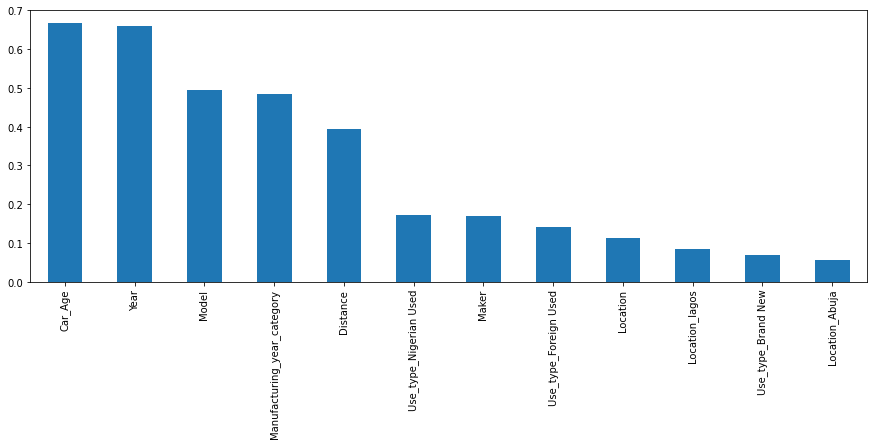

In [152]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(15,5))

In [153]:
from sklearn.feature_selection import SelectKBest
selected = SelectKBest(mutual_info_regression,k= 10)
selected.fit(x_train,y_train)
sel = x_train.columns[selected.get_support()]


In [154]:
x_train = x_train[sel]
x_train.head()

,Location,Maker,Model,Year,Distance,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_lagos
5593,0.5,0.791667,-0.890601,-0.500000,-0.524598,1,0,0.500000,-1.0,1
2537,-0.5,0.791667,0.109399,-0.166667,-0.168694,1,0,0.166667,0.0,0
3357,0.5,0.791667,0.848998,0.500000,0.278249,1,0,-0.500000,0.0,1
2688,0.5,0.791667,-0.456086,-1.333333,1.706834,0,1,1.333333,-1.0,1
5645,0.5,-0.625000,1.033898,-0.833333,1.631803,0,1,0.833333,-1.0,1


In [ ]:
### Train with new features

In [155]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rfr, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.187 (0.008)


In [156]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [157]:
x_test = x_test[sel]
x_test.head()

,Location,Maker,Model,Year,Distance,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_lagos
1935,0.5,-1.416667,0.386749,-0.333333,-0.437683,1,0,0.333333,0.0,1
3597,-0.5,0.000000,-0.049307,-0.166667,0.531648,0,1,0.166667,0.0,0
343,0.5,0.000000,-0.033898,1.166667,-0.916238,1,0,-1.166667,1.0,1
1497,-0.5,-0.458333,1.180277,0.000000,-0.203324,0,1,0.000000,0.0,0
573,-0.5,0.791667,0.120185,1.000000,-0.603766,1,0,-1.000000,1.0,0


In [77]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [158]:
preds = rfr.predict(x_test)
preds = np.exp(preds)
preds

array([ 4.35460369,  5.50113906, 45.52147697, ..., 21.18630023,
        1.94820026, 93.38188146])

In [160]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,preds,squared = False)

21.698231137331515

In [ ]:
## Submit with random forest
preds = rfr.predict(test_data)
preds = np.exp(preds)

In [161]:
### Train selected features with xgboost
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor()#(n_estimators =  ,learning_rate = 0.15)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


Mean MAE: 0.176 (0.007)


In [83]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [84]:
x_test = x_test[sel]

In [85]:
preds = model.predict(x_test)
preds = np.exp(preds)
preds

array([ 6.4604917,  8.557488 , 42.215595 , ..., 27.712488 ,  4.1032257,
       96.849686 ], dtype=float32)

In [86]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

14.016154847486517

In [87]:
test_data = test_data[sel]

In [88]:
## Make submissions
predictions = model.predict(test_data)
preds = np.exp(predictions)
preds


array([ 5.7176394,  7.629434 ,  6.091938 , ...,  8.396715 , 12.498505 ,
        8.414515 ], dtype=float32)

In [91]:
# make submission
# import train data
sub = open(r"C:\Users\user\Desktop\ML PROJECTS\Great_Motors_car_price\Datasets\SampleSubmission.csv")
sub = pd.read_csv(sub)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [92]:
sub["Amount (Million Naira)"] = preds
sub.to_csv("Submission9.csv",index=False)
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,5.717639
1,VHL17149,7.629434
2,VHL10927,6.091938
3,VHL12909,6.094404
4,VHL12348,10.715596


In [21]:

# HYperparameter tuning with random forest
#Hyperparametert Tuning
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop = 1200,num = 12)]
#number of features to consider at every split
#max_features = ["auto","sqrt"]
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]



In [22]:
# import randomized search CV
from sklearn.model_selection import RandomizedSearchCV
# create random_grid
random_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}
print(random_grid) 

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [23]:
#apply randomized searchcv
rfr_random=RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,
           verbose=2,random_state=2,n_jobs=1)

In [24]:
rfr_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   4.3s
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   4.4s
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   4.4s
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   4.3s
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   4.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=  15.9s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=  16.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=  15.6s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=  15.5s
[CV] EN

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=2)

In [28]:
preds = rfr_random.predict(x_test)
preds = np.exp(preds)
preds

array([ 6.36986488,  7.51861058, 44.36709349, ..., 23.17023933,
        3.95920662, 99.16748927])

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

16.80484062899412

### Xgboost

In [20]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import xgboost
xgb = xgboost.XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, x_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.131 (0.005)


In [21]:

xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
preds = xgb.predict(x_test)
preds = np.exp(preds)
preds


array([  6.510146,   8.210359,  46.600945, ...,  23.093658,   4.060185,
       104.87154 ], dtype=float32)

In [23]:
y = np.exp(y_test)
y

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

13.210545056002497

### Gradient boosting

In [40]:
# evaluate an xgboost regression model on the car price target
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 150,learning_rate = 0.33,max_depth = 7)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(gbr, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.137 (0.006)


In [41]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.33, max_depth=7, n_estimators=150)

In [42]:
preds = gbr.predict(x_test)
preds = np.exp(preds)
preds


array([ 6.32117735,  8.29050518, 50.94173362, ..., 23.25647067,
        4.448721  , 98.56555299])

In [43]:
y = np.exp(y_test)
y

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

14.379036108394528

In [53]:
# buildign stacked model
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression
estimators=[("rf",rfr),
           ("xg",xgb),
           ("gbr",gbr)]
stack_model=StackingRegressor(estimators=estimators,final_estimator=xgb)
stack_model.fit(x_train,y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xg',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learni...
                                               eval_metric=None, gamma=0,
                                               gpu_id=-1,
                                               grow_policy='depthwise',
                                               importance_type=None,
                                               interaction_constraints='',
                                               learning_rate=0.300000012,
                                               max_bin=256, max_cat_to_onehot=4,
                                               max_delta_step=0, max_depth=6,
                                               max_leaves=0, min_child_weight=1,
                                               missing=nan,
                                               monotone_constraints='()',
                                               n_estimators=100, n_jobs=0,
                                               num_parallel_tree=1,
                                               predictor='auto', random_state=0,
                                               reg_alpha=0, reg_lambda=1, ...))

In [54]:
preds = stack_model.predict(x_test)
preds = np.exp(preds)
preds


array([ 6.4283233,  8.101356 , 58.119064 , ..., 22.859354 ,  4.318022 ,
       82.46555  ], dtype=float32)

In [55]:
y = np.exp(y_test)
y

1935      5.75
3597      6.73
343      44.70
1497      9.20
573      19.50
         ...  
5703     20.85
5196      8.65
1684     30.00
644       4.45
6084    197.00
Name: Amount, Length: 1438, dtype: float64

In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds,squared = False)

14.77298839304881

##### Seems our accuracy is not increasing 

#### lets check through the data again

In [52]:
df.head()

,Location,Maker,Model,Year,Colour,Distance,Amount,Use_type_Brand New,Use_type_Foreign Used,Use_type_Nigerian Used,Car_Age,Manufacturing_year_category,Location_Ibadan
0,-0.5,-0.708333,-0.725732,0.000000,0.5625,0.166617,1.435085,0,0,1,0.000000,0.0,0
1,0.0,-0.625000,0.909091,0.166667,0.5625,0.467914,1.704748,0,0,1,-0.166667,0.0,1
2,0.5,-0.208333,0.656394,-0.166667,0.5000,0.308364,2.415914,0,1,0,0.166667,0.0,0
3,-0.5,0.000000,-0.036980,1.000000,-0.3750,-1.427655,3.210844,0,1,0,-1.000000,1.0,0
4,0.0,0.791667,0.069337,-1.500000,0.5000,0.470101,1.526056,0,0,1,1.500000,-1.0,1


C:\Users\user\anaconda3\envs\great_motor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

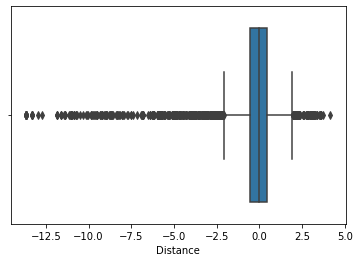

In [65]:
# Outliers check
sns.boxplot(df["Distance"])